### Deploy Docker Containers into AKS cluster using Azure Pipelines | Deploy Docker Image into AKS cluster using Azure Release Pipelines

In [ ]:
'''

Pre-requistes:
1. AKS cluster needs to be up running. You can create AKS cluster using one of the below options:

Create AKS cluster in Azure portal directly
Create AKS cluster using Azure CLI
Create AKS cluster using Terraform

2. ACR is also setup in Azure cloud. 

3. Already created Azure DevOps dashboard in 
https://dev.azure.com/

4. Dockerfile created along with the application source code
5. Make sure AKS has pull access from ACR

In [ ]:
'''

Implementation Steps
Step 1 - Create Azure Build pipeline for building Docker images and uploading into ACR
Step 2 - Create Azure Release pipeline for deploying Docker containers into AKS

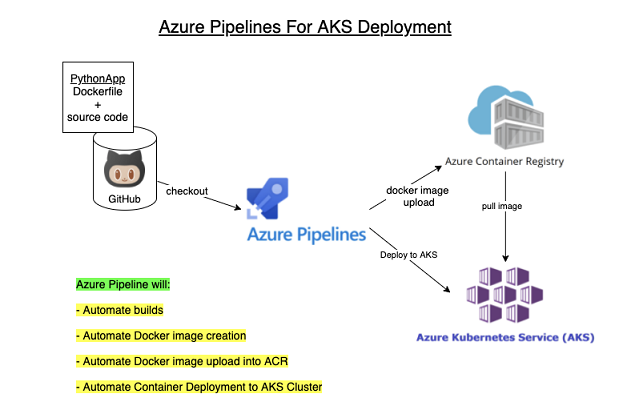

#### Step 1 - How to create a Azure Build Pipeline

In [ ]:
1. Login into your Azure DevOps dashboard
2. Click on Pipelines.

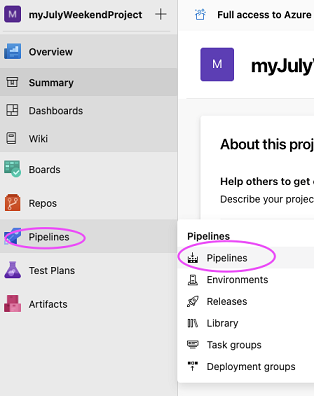

In [ ]:
# 3. Click on New Pipeline

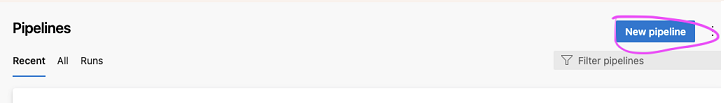

In [ ]:
# 4. Click on use the classic editor

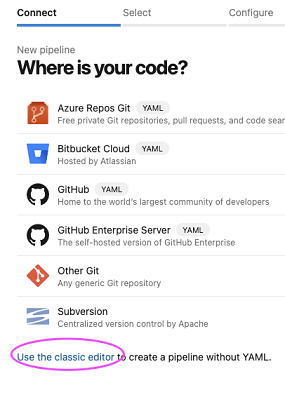

In [ ]:
# Enter your repo name and branch name where you have stored your source code along with Dockerfile

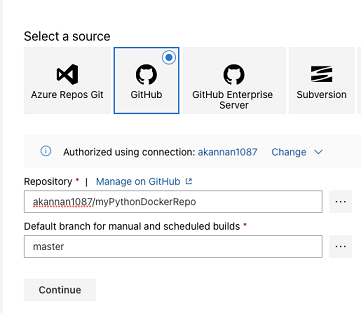

In [ ]:
# Click on Continue. Now choose the template by typing Docker, Select Docker container and Apply.

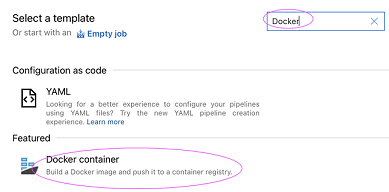

In [ ]:
# Now pipeline is created with two tasks already. We need to configure it.

# Let's modify Build an image task.

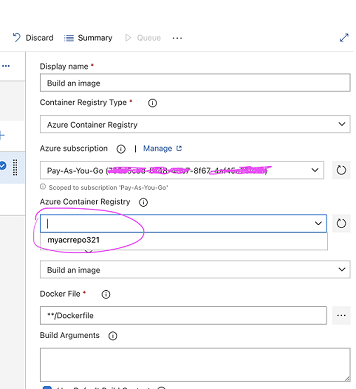

In [ ]:
# Select Push an image task

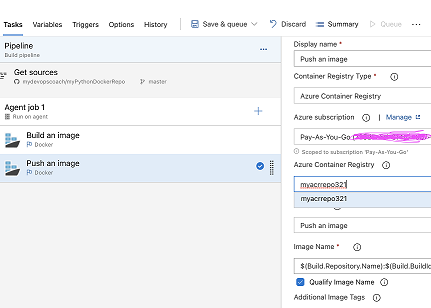

In [ ]:
# Add a task for Copying YAML file, enter the Kubernetes deployment YAML file

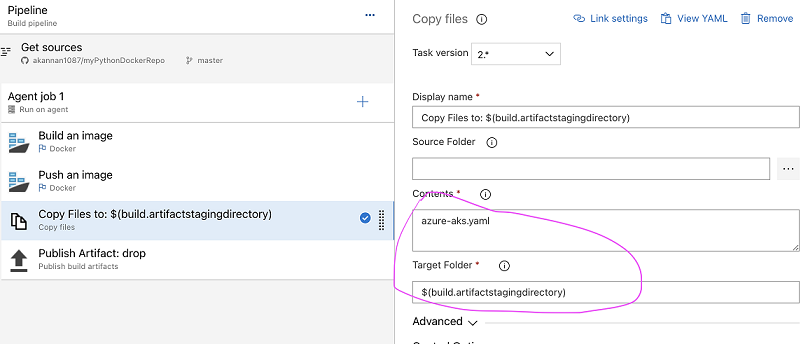

In [ ]:
# Add Publish artifact task

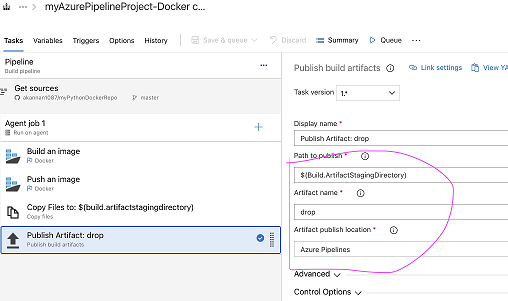

In [ ]:
# Now click Save + Queue and run to start Building the pipeline

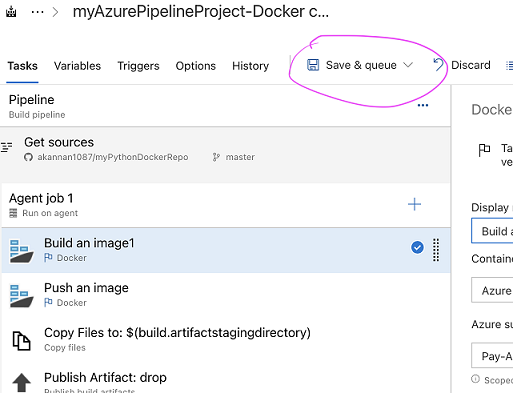

In [ ]:
# Once the build is completed, you should be able to see the Docker images under 
# Services --> Repositories

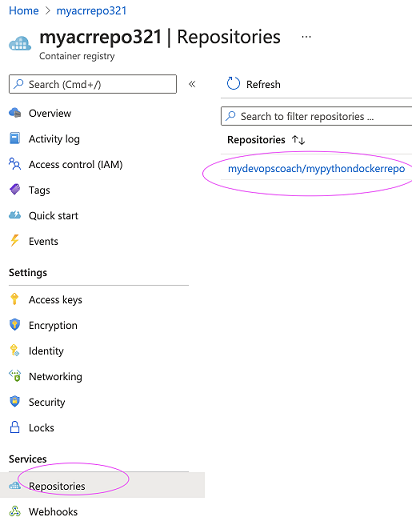

#### Step 2 - How to Create Release pipeline for deploying Docker containers into AKS Cluster 

In [ ]:
Go to Pipelines --> Click on Releases --> New Release pipeline

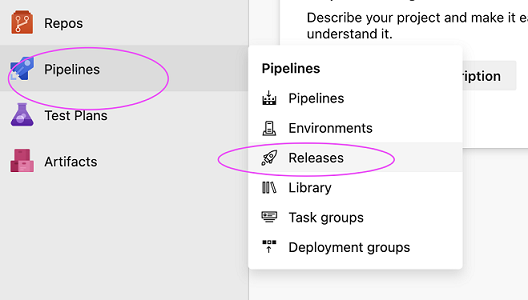

In [ ]:
Click on Stage 1 and choose a template by selecting

Deploy to a Kubernetes cluster and click on Apply

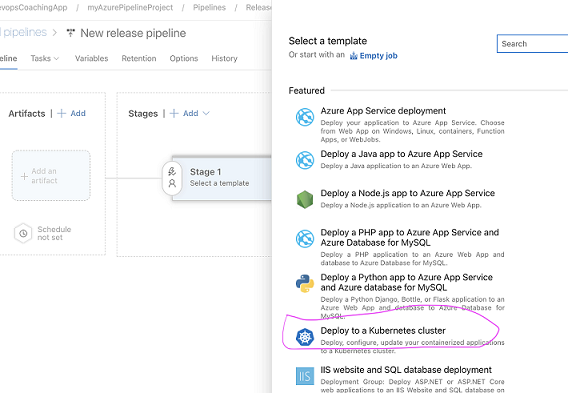

In [ ]:
Change the stage name to Deploy to AKS

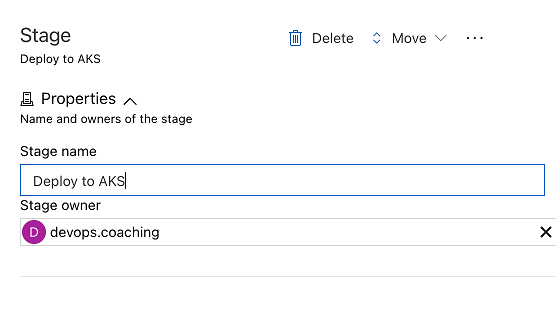

In [ ]:
Now click on Add an artifact

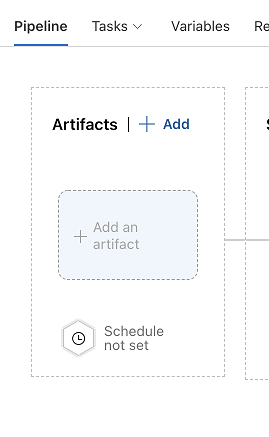

In [ ]:
Select the Build pipeline and click on the latest version

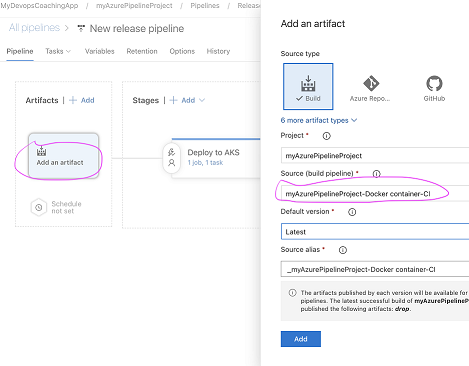

In [ ]:
Now click on Deploy to AKS stage

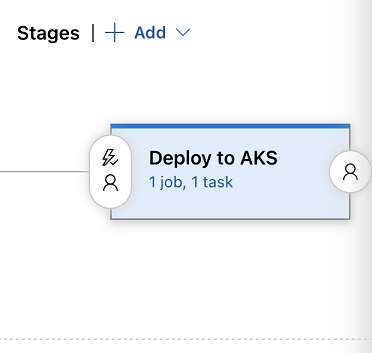

In [ ]:
Click on kubectl apply

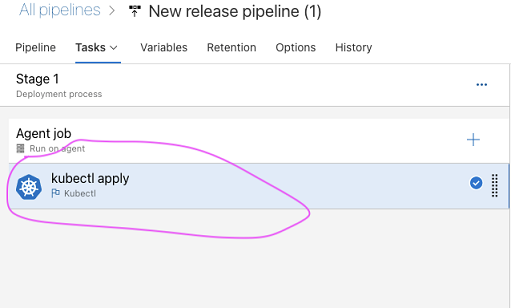

In [ ]:
Now Click on New to enter AKS cluster connection info

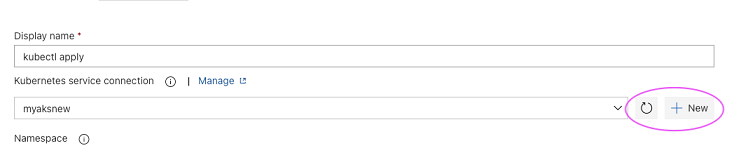

In [ ]:
Choose the Azure subscription and enter Microsoft user credentials.


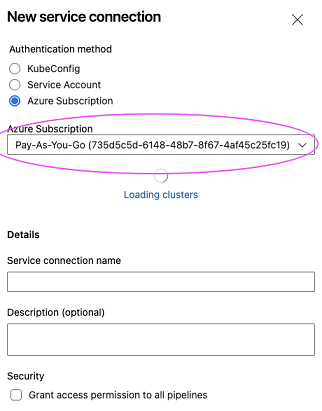

In [ ]:
Select AKS cluster from the drop down, choose default namespace


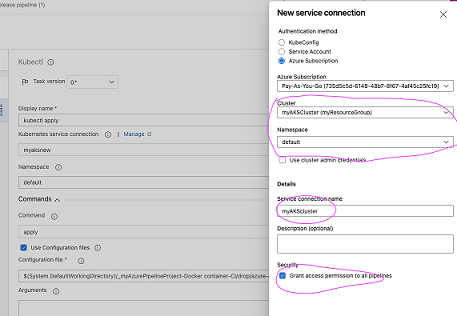

In [ ]:
Choose command as apply and select the yaml file from the dropdown from Configuration file 

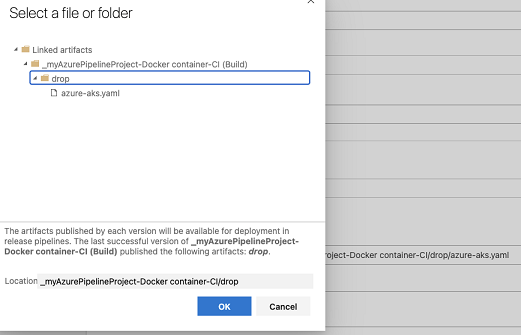

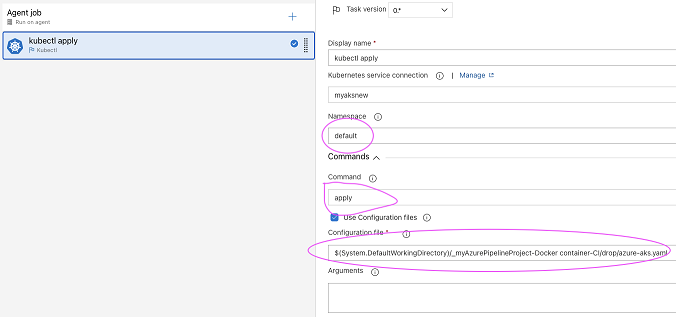

In [ ]:
Now click on Save,
Click on Create a release

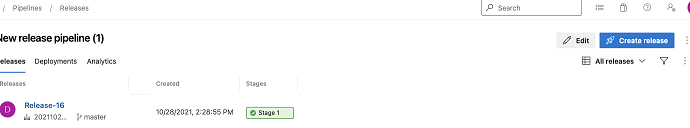

In [ ]:
and then click Create to run the deployment

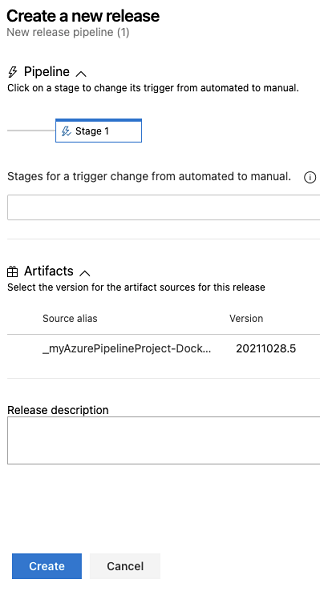

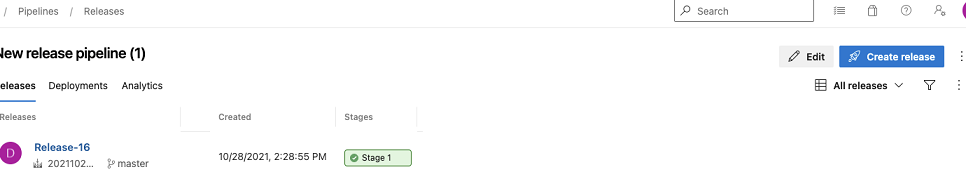

In [ ]:
Click on Stage to see the logs

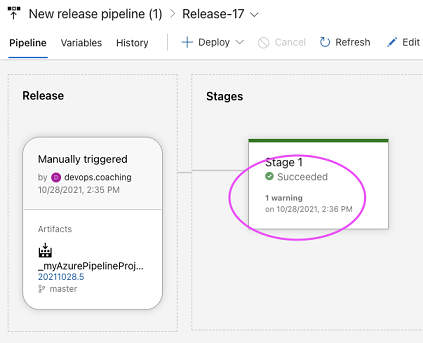

In [ ]:
Now you will the following tasks are in green to confirm Deployment was successful.

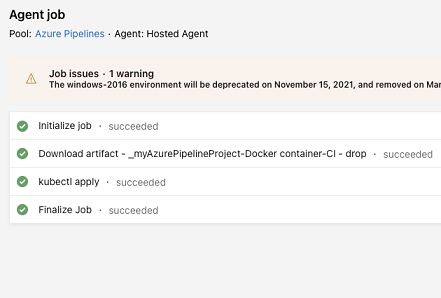

In [ ]:
Let's check if deployment created any pods

kubectl get deployments

kubectl get pods

kubectl get svc

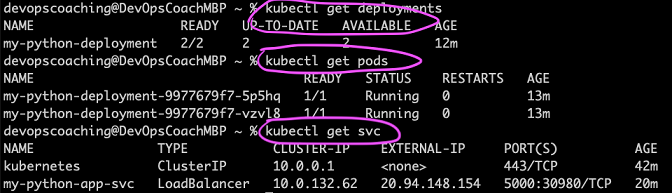

In [ ]:
Now try to access application running inside AKS cluster by using external IP and port number

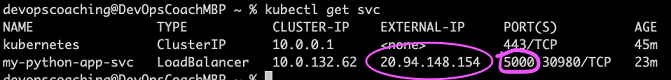

In [ ]:
Go to the browser enter http://external IP:5000

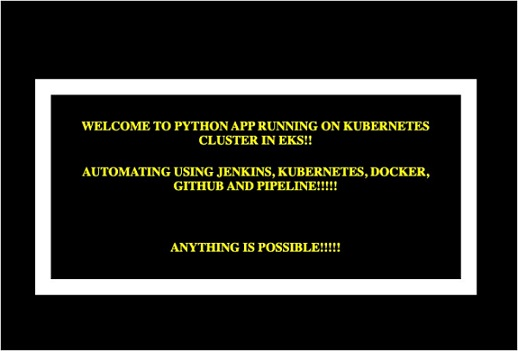

In [ ]:
# code

In [ ]:
'''
myPythonDockerRepo/templates/index.html

<html>
  <head>
    <style type="text/css">
      body {
        background: black;
        color: yellow;
      }
      div.container {
        max-width: 500px;
        margin: 100px auto;
        border: 20px solid white;
        padding: 10px;
        text-align: center;
      }
      h4 {
        text-transform: uppercase;
      }
    </style>
  </head>
  <body>
    <div class="container">
      <h4>Welcome to Docker Container running in EKS Cluster!!</h4>
      <h4>Deployed Containers Automation using Jenkins Pipelines!!!!!</h4>
      <br>
       <h4>Learning containers is really fun and awesome!!!!!</h4>
    </div>
  </body>
</html>

In [ ]:
'''
myPythonDockerRepo/Dockerfile

# this is my base image
FROM alpine:3.5

# Install python and pip
RUN apk add --update py2-pip

# install Python modules needed by the Python app
COPY requirements.txt /usr/src/app/
RUN pip install --no-cache-dir -r /usr/src/app/requirements.txt

# copy files required for the app to run
COPY app.py /usr/src/app/
COPY templates/index.html /usr/src/app/templates/

# tell the port number the container should expose
EXPOSE 5000

# run the application
CMD ["python", "/usr/src/app/app.py"]

In [ ]:
'''
myPythonDockerRepo/app.py

from flask import Flask, render_template
import random

app = Flask(__name__)

# list of cat images
images = [
    "http://ak-hdl.buzzfed.com/static/2013-10/enhanced/webdr06/15/9/anigif_enhanced-buzz-25158-1381844793-0.gif",
    "http://ak-hdl.buzzfed.com/static/2013-10/enhanced/webdr03/15/10/anigif_enhanced-buzz-11980-1381846269-1.gif"
]

@app.route('/')
def index():
    url = random.choice(images)
    return render_template('index.html', url=url)

if __name__ == "__main__":
    app.run(host="0.0.0.0")


In [ ]:
'''
myPythonDockerRepo/requirements.txt

Flask==0.10.1

In [ ]:
'''
myPythonDockerRepo/install_steps.txt

Please follow the below steps for lab exercises:
###### First step - Build docker image by executing below command #####
sudo docker build . -t your_docker_user_id/myphythonapp
(note - change the above your_docker_user_id to userid you had created in cloud.docker.com)
sudo docker images
the above command to see the image you had created
sudo docker login
enter your docker hub crendetials
sudo docker push your_docker_user_id/myphythonapp
(note - change the above your_docker_user_id to userid you had created in cloud.docker.com)

How to run application?

sudo docker run -p 8081:5000 --rm --name myfirstApp1 your_docker_user_id/myphythonapp
now go to browser enter the public dns name with port no 8081.  

### if you would like to run on differet port 
sudo docker run -p 8091:5000 --rm --name myfirstApp2 your_docker_user_id/myphythonapp
Make sure you open port 8091 in security firewall rules.


sample commands for reference:( you dont have to execute, please refer them)

sudo docker images 
   - this command will list all docker images you have on your machine.
   
sudo docker search ubuntu – search the image in docker registry
sudo docker pull ubuntu
  - pull the image from docker registry
sudo docker ps 
  - list all the containers running
sudo docker ps -a  
  list all the containers running/ran
$ sudo docker run -it alpine /bin/sh  to run in interactive mode
$ sudo docker stop <container_id>
$ sudo docker rm  <container_id>

sudo docker rmi image_id --> To delete the images

sudo docker run alpine /bin/sh
sudo docker run -it alpine /bin/sh

sudo docker run alpine ls -l

sudo docker run -it --rm -p 8088:8080 tomcat

sudo docker run -d dockersamples/static-site
sudo docker stop 6a3884611cc6
sudo docker ps �> to know the running containers
sudo docker rm  6a3884611cc6
sudo docker run --name static-site -e AUTHOR="Your Name" -d -P dockersamples/static-site
sudo docker port static-site
sudo curl http://localhost:32768
sudo docker run --name static-site-2 -e AUTHOR="Ananth Kannan" -d -p 8080:80 dockersamples/static-site